In [8]:
from sklearn import ensemble, datasets, metrics, model_selection, tree

import numpy as np
import pandas as pd

In [5]:
dataset = datasets.load_digits()

In [6]:
data = dataset.data
target = dataset.target

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [20]:
result = model_selection.cross_val_score(tree.DecisionTreeClassifier(),
                                            data, target,
                                            cv=10).mean()
print(result)

0.813550589695841


In [18]:
def write_answer_1(mean):
    with open("Ответы/hometask1.txt", "w") as fout:
        fout.write(str(mean))

In [19]:
write_answer_1(result)

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. 

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [23]:
baggingClassifier = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(),
                                    n_estimators=100)
result = model_selection.cross_val_score(baggingClassifier,
                                            data, target,
                                            cv=10).mean()

In [24]:
def write_answer_2(mean):
    with open("Ответы/hometask2.txt", "w") as fout:
        fout.write(str(mean))

In [26]:
write_answer_2(result)

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на sqrt(d)
случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [39]:
int(np.sqrt(data.shape[1]))

8

In [40]:
baggingClassifier = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(),
                                    n_estimators=100,
                                              max_features=int(np.sqrt(data.shape[1])))
result = model_selection.cross_val_score(baggingClassifier,
                                            data, target,
                                            cv=10).mean()

In [34]:
def write_answer_3(result):
    with open("Ответы/hometask3.txt", "w") as fout:
        fout.write(str(result))

In [35]:
write_answer_3(result)

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же sqrt(d) признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.


In [ ]:
tree = tree.DecisionTreeClassifier

In [46]:
baggingClassifier = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_features=int(np.sqrt(data.shape[1]))),
                                    n_estimators=100,
                                     bootstrap=False)
result = model_selection.cross_val_score(baggingClassifier,
                                            data, target,
                                            cv=10).mean()

In [48]:
def write_answer_4(result):
    with open("Ответы/hometask4.txt", "w") as fout:
        fout.write(str(result))

In [49]:
write_answer_4(result)

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно. 

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

result = model_selection.cross_val_score(baggingClassifier,
                                            data, target,
                                            cv=10).mean()7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [52]:
result = model_selection.cross_val_score(ensemble.RandomForestClassifier(),
                                            data, target,
                                            cv=10).mean()

In [54]:
randomForest = ensemble.RandomForestClassifier

In [56]:
from matplotlib import pyplot as plt

In [65]:
estimators = range(0, 150, 10)
results = [model_selection.cross_val_score(ensemble.RandomForestClassifier(n_estimators=n_estimators),
                                            data, target,
                                            cv=10).mean() for n_estimators in estimators]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    self._validate_estimator()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this

Text(0.5, 1.0, 'Accuracy VS N_estimators')

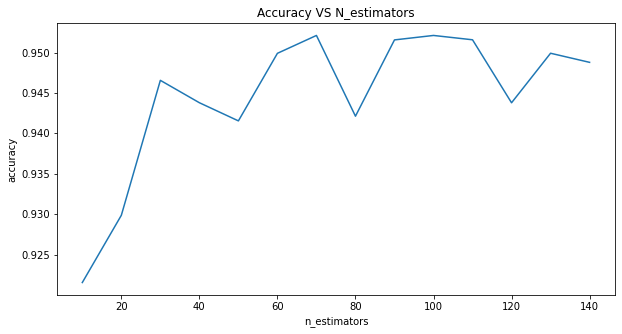

In [66]:
plt.figure(figsize=(10,5))
plt.plot(estimators, results)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Accuracy VS N_estimators')

In [69]:
depths = [5,10,15,20, 50 ,100, None]
results = [model_selection.cross_val_score(ensemble.RandomForestClassifier(max_depth=max_depth),
                                            data, target,
                                            cv=10).mean() for max_depth in depths]

Text(0.5, 1.0, 'Accuracy VS N_estimators')

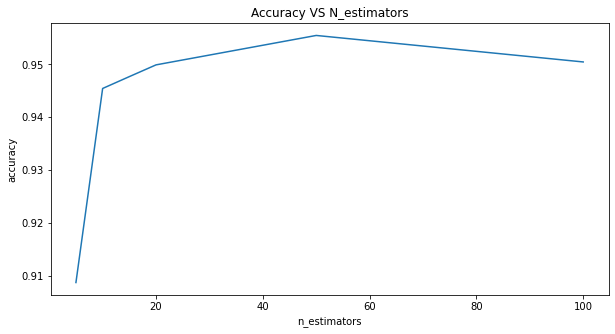

In [70]:
plt.figure(figsize=(10,5))
plt.plot(depths, results)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Accuracy VS N_estimators')

In [71]:
features = range(5, 85, 10)
results = [model_selection.cross_val_score(ensemble.RandomForestClassifier(max_features=max_features),
                                            data, target,
                                            cv=10).mean() for max_features in features]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

Text(0.5, 1.0, 'Accuracy VS N_features')

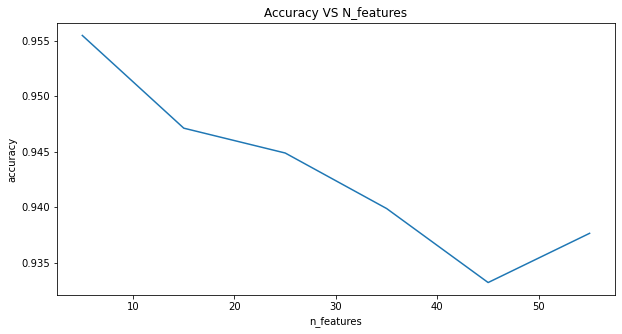

In [73]:
plt.figure(figsize=(10,5))
plt.plot(features, results)
plt.xlabel('n_features')
plt.ylabel('accuracy')
plt.title('Accuracy VS N_features')